# Optical Wave Propagation

Author: Ritz Aguilar (c) 2023

Propagators implemented:
1. RS_ASM - working
2. Fresnel_IR - working
3. Fresnel_TF: one-step (a) and two-step (b)
4. Fresnel_ASM: with (a) and without (b) evanescent waves
5. Fraunhofer   

In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
from objects import Objects
from propagators import Propagate
from time import time

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
backend = torch

cuda


In [3]:
# Define physical parameters
aperture_size = 100e-6 # physical size of the aperture in meters
num_pixels = 2**8 # number of pixels
pixel_size = aperture_size / num_pixels # pixel size
photon_energy = 2.3305299436090226e6

# wavelength = 0.5e-6 # in meters
# h = 6.6261e-34 # in J*s (Planck's constant)
# c = 2.9979e8 # in m/s (speef of light in vacuum)
# photon_energy = h*c/wavelength
# print("Photon Energy:", photon_energy)

O = Objects(device=device, backend=np)
O.create_2Darray(num_pixels,num_pixels)
circ = O.create_circle(r = 0.25, x0 = 0, y0 = 0)
rect = O.create_rect(0.5,0.5)
Uin = rect

In [4]:
pixel_size

3.90625e-07

In [5]:
# only for torch backend
# print(circ.cpu().numpy().dtype)
# print(rect.cpu().numpy().dtype)
# plt.imshow(circ.cpu())
# plt.imshow(rect.cpu())
# print(circ.get_device())

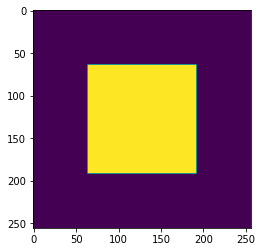

In [6]:
plt.imshow(rect)

In [7]:
Uin.shape

(256, 256)

In [8]:
test = torch.Tensor((2,2))
test.shape[-1]
num_pixels

256

In [9]:
pos = 1e3

device1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
start_torch = time()

P1 = Propagate(device=device1,
                     pixel_number=Uin.shape[0],
                     pixel_size=pixel_size)

prop_field1 = P1.fresnel_onestep_IR(field_in=Uin,
                             pixel_number=Uin.shape[0],
                             pixel_size=pixel_size,
                             position=pos,
                             photon_energy=photon_energy,
#                              has_evanescent=False,
                             reset=True,
                             pad = int(num_pixels/4)
                                   )
end_torch = time()

device2 = "cpu"
start_numpy = time()
P2 = Propagate(device=device2,
                     pixel_number=Uin.shape[0],
                     pixel_size=pixel_size)

prop_field2 = P2.fresnel_onestep_TF(field_in=Uin,
                             pixel_number=Uin.shape[0],
                             pixel_size=pixel_size,
                             position=pos,
                             photon_energy=photon_energy,
#                              has_evanescent=False,
                             reset=True,
                             pad = int(num_pixels/4),
                             backend = np)
end_numpy = time()

cuda
5.320000233131535e-07
cpu
5.320000233131535e-07


/home/thiess94/.local/lib/python3.10/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
field1 = torch.abs(prop_field1).cpu().numpy()
profile1 = field1[int(field1.shape[0]/2),:]
profile2 = prop_field2[int(field1.shape[0]/2),:]

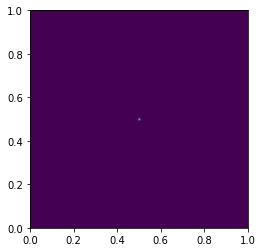

In [11]:
plt.imshow(field1**2, extent=[0, 1, 0, 1])

In [12]:
int(field1.shape[0]/2)

192

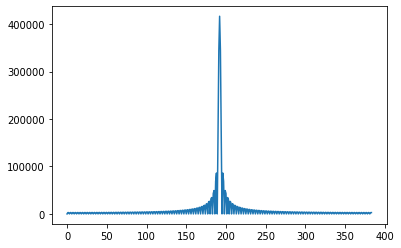

In [13]:
plt.plot(field1[int(Uin.shape[0]/2),:])

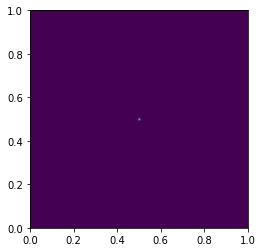

In [14]:
plt.imshow(np.abs(prop_field2)**2, extent=[0, 1, 0, 1])

/home/thiess94/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


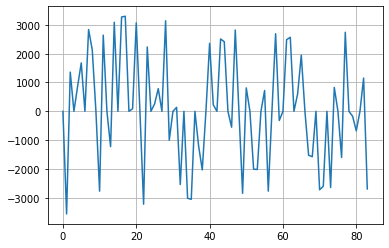

In [15]:
plt.plot(prop_field2[int(Uin.shape[0]/2),300:470])
plt.grid()

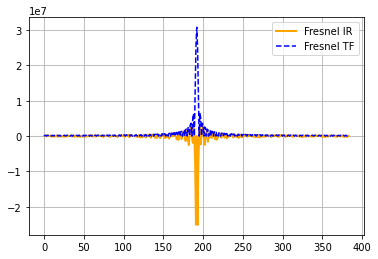

In [16]:
fig, ax = plt.subplots() 
  
ax.plot(profile2, c ='orange', lw=2, label ='Fresnel IR') 
ax.plot(profile1, '--b', label ='Fresnel TF') 
# ax.axis('equal') 
  
leg = ax.legend(loc ="upper right")
ax.grid()

In [17]:
print("Total Time:")
torch_diff = end_torch - start_torch
numpy_diff = end_numpy - start_numpy
print("Numpy: ", end_numpy - start_numpy, "seconds")
print("Torch: ", end_torch - start_torch, "seconds")
print("Torch is faster by",abs(numpy_diff - torch_diff)/numpy_diff*100,"% than Numpy for an image size of",num_pixels**2/1e6,"MP.")

Total Time:
Numpy:  0.030950546264648438 seconds
Torch:  2.5618011951446533 seconds
Torch is faster by 8177.07909656745 % than Numpy for an image size of 0.065536 MP.


In [18]:
num_pixels**2

65536

complex128


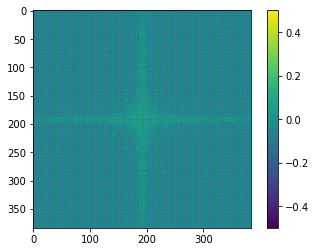

In [19]:
import matplotlib.pyplot as plt
plt.imshow((np.abs(prop_field2)-np.abs(prop_field1.cpu().numpy())) / 
           (np.abs(prop_field2)+np.abs(prop_field1.cpu().numpy()))/2)
plt.colorbar()
print(prop_field2.dtype)

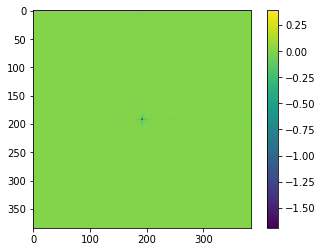

In [20]:
plt.imshow((np.abs(prop_field2)-np.abs(prop_field1.cpu().numpy())))
plt.colorbar()

In [21]:
print(prop_field2.shape)
print(type(prop_field2))

print(prop_field1.cpu().numpy().shape)
print(type(prop_field1.cpu().numpy()))

(384, 384)
<class 'numpy.ndarray'>
(384, 384)
<class 'numpy.ndarray'>
